## Logistic regression concepts

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
from pylab import rcParams

import sklearn
# import the logistic regression model, as well as the metrics module from Scikit Learn - that's useful for scoring our predictive models.
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

## Logistic regression on the titanic dataset

This data came from Kaggle (https://www.kaggle.com/c/titanic/data)


In [3]:
url = '../data/titanic-training-data.csv'
titanic_training = pd.read_csv(url)
titanic_training.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Just a quick fyi (we will examine these variables more closely in a minute):

##### VARIABLE DESCRIPTIONS

Survived - Survival (0 = No; 1 = Yes)<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
SibSp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare (British pound)<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

<Axes: xlabel='Survived', ylabel='count'>

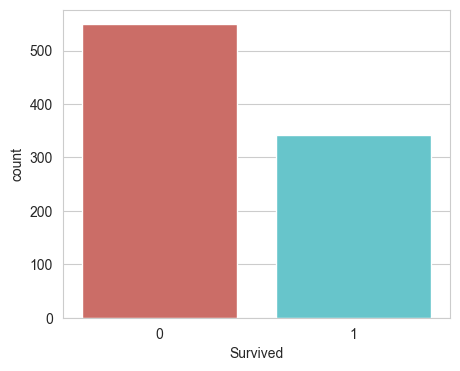

In [5]:
sns.countplot(x = "Survived", hue="Survived", data=titanic_training, palette="hls", legend=False)

In [6]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



- **Survival Rate**: The survival rate is approximately 38.4%.
- **Passenger Class**: The majority of passengers were in the 3rd class.
- **Age**: The average age of passengers was approximately 29.7 years, with a standard deviation of 14.5 years. There are some missing values in the Age column.
- **Siblings/Spouses Aboard**: Most passengers had no siblings or spouses aboard.
- **Parents/Children Aboard**: Most passengers had no parents or children aboard.
- **Fare**: The fare paid by passengers varied significantly, with an average fare of 32.20 and a maximum fare of 512.33.
- **Cabin**: The Cabin column has a significant number of missing values.
- **Embarked**: Most passengers embarked from Southampton (S).


In [8]:
titanic_data = titanic_training.drop(['Name','Ticket','Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Parch', ylabel='Age'>

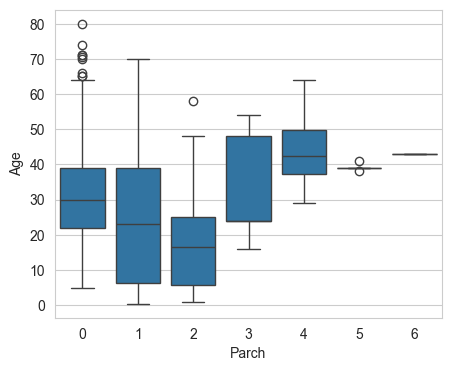

In [9]:
sns.boxplot(x="Parch", y = "Age", data = titanic_data)

In [10]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [11]:
def age_approx(cols):
    Age = cols.iloc[0]
    Parch = cols.iloc[1]
    
    if pd.isnull(Age):
        if Parch == 0: return 32
        elif Parch == 1: return 24
        elif Parch == 2: return 17
        elif Parch == 3: return 33
        elif Parch == 4: return 45
        else: return 30 # average age of all passengers 
        
    else: return Age

In [12]:
titanic_data["Age"] = titanic_data[["Age","Parch"]].apply(age_approx, axis=1)

In [13]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [14]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

gender_cat = titanic_data["Sex"]
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5] # --> 1: male, 0: female

array([1, 0, 0, 0, 1])

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
gender_df = pd.DataFrame(gender_encoded, columns=["male_gender"])
gender_df.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [18]:
embarked_cat = titanic_data["Embarked"]
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [19]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(categories="auto")
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_df = pd.DataFrame(embarked_1hot_mat, columns=["C","Q","S"])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [20]:
titanic_data.drop(["Sex", "Embarked"], axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [21]:
titanic_dmy = pd.concat([titanic_data, gender_df, embarked_df], axis =1, verify_integrity=True).astype(float)
titanic_dmy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


<Axes: >

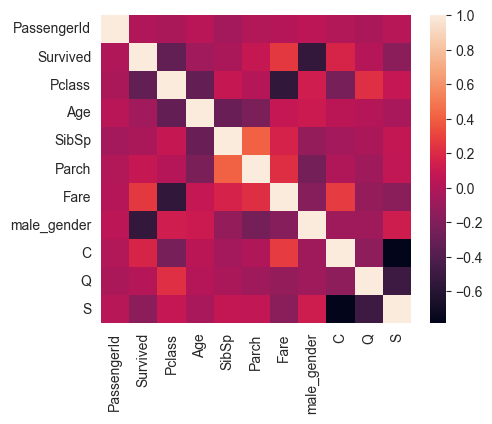

In [22]:
sns.heatmap(titanic_dmy.corr())


In [23]:
titanic_dmy.drop(["Fare"], axis=1, inplace=True)
titanic_dmy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Pclass       889 non-null    float64
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    float64
 5   Parch        889 non-null    float64
 6   male_gender  889 non-null    float64
 7   C            889 non-null    float64
 8   Q            889 non-null    float64
 9   S            889 non-null    float64
dtypes: float64(10)
memory usage: 69.6 KB


In [25]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop("Survived",axis=1), titanic_dmy["Survived"], test_size=0.2, random_state=200)

In [26]:
print(X_train.shape)

(711, 9)


In [27]:
print(y_train.shape)

(711,)


In [28]:
X_train[0:5]

,PassengerId,Pclass,Age,SibSp,Parch,male_gender,C,Q,S
719,721.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,3.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,1.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,3.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


In [29]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train.values, y_train.values)

LogisticRegression(solver='liblinear')

In [30]:
y_pred = LogReg.predict(X_test.values)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       109
         1.0       0.84      0.70      0.76        69

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



In [32]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[384,  56],
       [ 90, 181]], dtype=int64)

In [33]:
precision_score(y_train, y_train_pred)

0.7637130801687764